In [8]:
import pandas as pd
import numpy as np
from jenks import jenks
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [3]:
urlstring = 'https://capellan.cartodb.com/api/v2/sql?format=CSV&q=SELECT%20*%20FROM%20nyct2010_density'
carto_table = pd.read_csv(urlstring)

In [4]:
carto_table.describe()

,cartodb_id,shape_sqft,ct_density,the_geom_long,the_geom_lat,ctlabel,borocode,ct2010,boroct2010,puma,shape_leng,shape_area,ct2010_full,floorarea_sqft
count,2161.000000,2.161000e+03,2161.000000,2161.000000,2161.000000,2161.000000,2161.000000,2161.000000,2161.000000,2161.000000,2161.000000,2.161000e+03,2161.000000,2161.000000
mean,1082.454882,3.880883e+06,1.085838,-73.915558,40.716199,413.252193,2.986118,41325.219343,3027442.757520,3959.633966,8715.103778,3.880865e+06,3027442.757520,2484006.304951
std,625.649841,7.951001e+06,1.162735,0.086771,0.083951,342.555696,1.095357,34255.569642,1106536.061666,145.122837,8497.298199,7.951004e+06,1106536.061666,2581148.207843
min,1.000000,4.478133e+05,0.000000,-74.242457,40.502545,1.000000,1.000000,100.000000,1000100.000000,3701.000000,2816.869448,4.478076e+05,1000100.000000,0.000000
25%,541.000000,1.683691e+06,0.459380,-73.966621,40.650196,155.000000,2.000000,15500.000000,2036300.000000,3808.000000,5622.863620,1.683689e+06,2036300.000000,1213325.000000
50%,1081.000000,1.988435e+06,0.776885,-73.918752,40.706579,302.000000,3.000000,30200.000000,3052900.000000,4009.000000,6504.836748,1.988440e+06,3052900.000000,1825884.000000
75%,1624.000000,3.174507e+06,1.235349,-73.860853,40.768971,581.000000,4.000000,58100.000000,4033700.000000,4103.000000,8734.805710,3.174475e+06,4033700.000000,2697666.000000
max,2166.000000,1.962343e+08,11.133145,-73.704582,40.912950,1621.000000,5.000000,162100.000000,5032300.000000,4114.000000,186126.741777,1.962341e+08,5032300.000000,29573098.000000


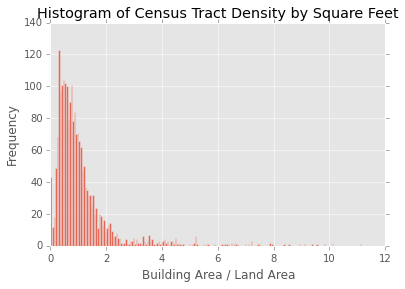

In [5]:
ax = carto_table.ct_density.hist(bins=200, alpha=0.8)
ax.set_xlabel('Building Area / Land Area')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Census Tract Density by Square Feet')

In [6]:
densities = carto_table.ct_density.tolist()
bins = jenks(densities, 12)

In [7]:
bins

[0.0,
 0.37161499,
 0.63762003,
 0.91503143,
 1.2236135,
 1.594895,
 2.0463634,
 2.7862606,
 3.7139275,
 4.686481,
 5.8479133,
 7.9289975,
 11.133144]

In [9]:
def goodness_of_variance_fit(array, classes):
    # get the break points
    classes = jenks(array, classes)

    # do the actual classification
    classified = np.array([classify(i, classes) for i in array])

    # max value of zones
    maxz = max(classified)

    # nested list of zone indices
    zone_indices = [[idx for idx, val in enumerate(classified) if zone + 1 == val] for zone in range(maxz)]

    # sum of squared deviations from array mean
    sdam = np.sum((array - array.mean()) ** 2)

    # sorted polygon stats
    array_sort = [np.array([array[index] for index in zone]) for zone in zone_indices]

    # sum of squared deviations of class means
    sdcm = sum([np.sum((classified - classified.mean()) ** 2) for classified in array_sort])

    # goodness of variance fit
    gvf = (sdam - sdcm) / sdam

    return gvf

def classify(value, breaks):
    for i in range(1, len(breaks)):
        if value < breaks[i]:
            return i
    return len(breaks) - 1

In [18]:
gvf = 0.0
nclasses = 2
while gvf < .99:
    gvf = goodness_of_variance_fit(np.asarray(densities), nclasses)
    nclasses += 1
print gvf, nclasses

0.990159681102 15
